# Classification Models



## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data



In [2]:
df = pd.read_csv('KNN_Project_Data.csv')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Standardize the Variables



In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']

In [6]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [7]:
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,test_size=0.20)


## Modeling with KNN


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
# print(pred)

Other metrics: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric

## Predictions and Evaluations



In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test,pred))

[[80 22]
 [21 77]]


In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       102
           1       0.78      0.79      0.78        98

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [15]:
error_rate = []

for i in range(1,40):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

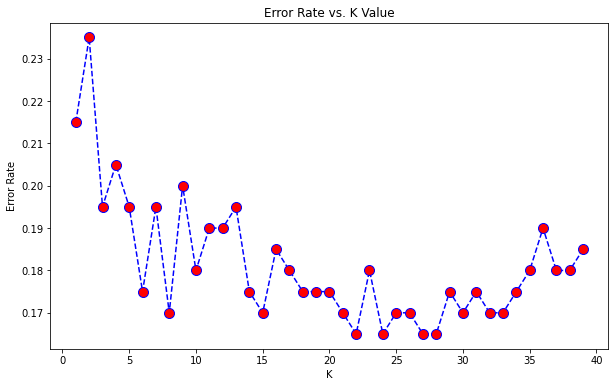

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [17]:
# K=19
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

K=19


[[81 21]
 [14 84]]


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       102
           1       0.80      0.86      0.83        98

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [33]:
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1]


In [34]:
print(confusion_matrix(y_test,y_pred))

[[79 23]
 [28 70]]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       102
           1       0.75      0.71      0.73        98

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



### Text Representation of the Tree

In [22]:
text_representation = tree.export_text(clf)
print(text_representation)
## Saving it to a file
with open("decistion_tree.txt", "w") as fout:
    fout.write(text_representation)

|--- feature_2 <= -0.26
|   |--- feature_1 <= -0.76
|   |   |--- feature_4 <= -0.29
|   |   |   |--- feature_1 <= -0.93
|   |   |   |   |--- feature_5 <= -0.81
|   |   |   |   |   |--- feature_4 <= -0.95
|   |   |   |   |   |   |--- feature_3 <= -0.90
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  -0.90
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  -0.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  -0.81
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.93
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  -0.29
|   |   |   |--- feature_9 <= 0.86
|   |   |   |   |--- feature_3 <= 0.95
|   |   |   |   |   |--- feature_2 <= -1.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -1.56
|   |   |   |   |   |   |--- feature_6 <= -1.06
|   |   |   |   |   |   |   |--- feature_8 <= -0.38
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   

### Visualization of the Tree

In [23]:
target_names = [str(i) for i in list(y.unique())]
feature_names = list(X.columns)    


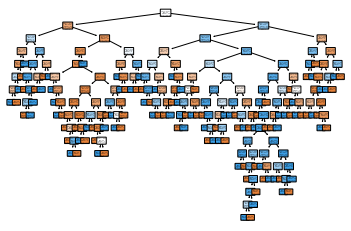

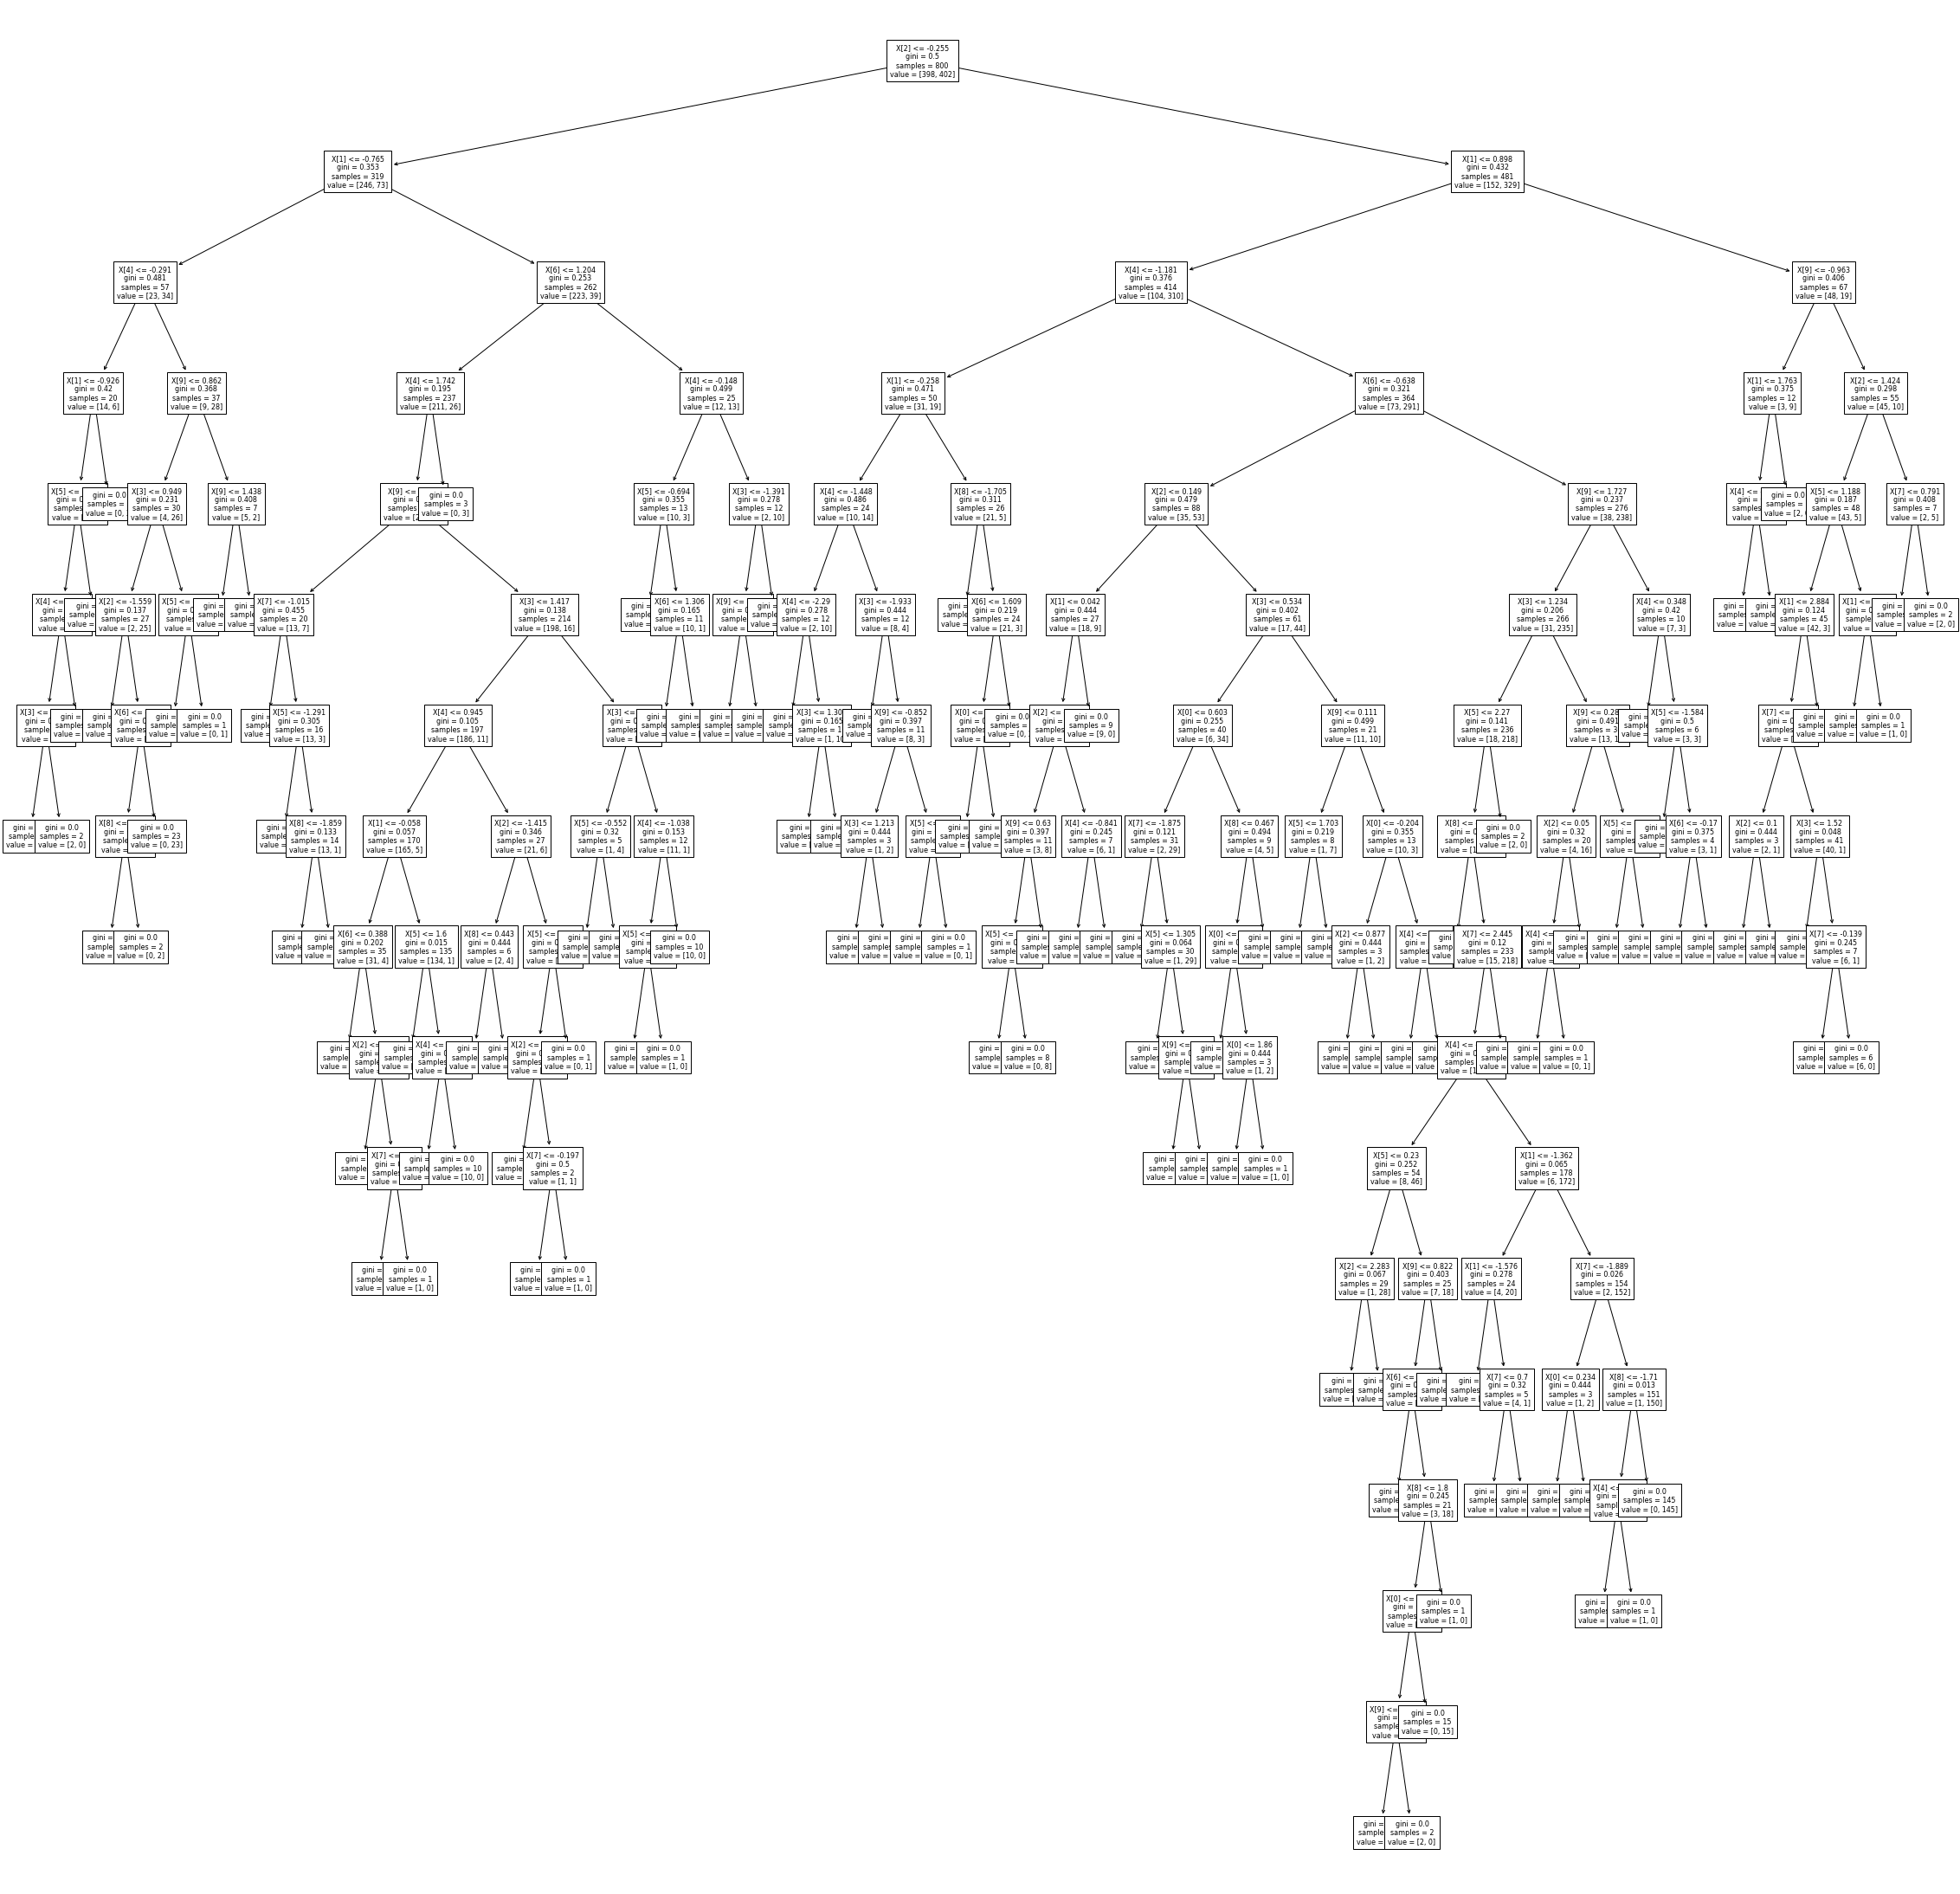

In [24]:
tree.plot_tree(clf, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.figure(figsize=(40,40)) 
tree.plot_tree(clf, fontsize=8)
plt.savefig('test.png')


## Random Forests

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [38]:
print(confusion_matrix(y_test,y_pred))

[[87 15]
 [16 82]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       102
           1       0.85      0.84      0.84        98

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200

